In [890]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [891]:
data = pd.read_excel('C:/Users/Len/Downloads/Employees.xlsx')

In [892]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [893]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [894]:
data['full name']= data['First Name']+" "+data['Last Name']

## 1- number of employees in each department

In [895]:
data['Department'].value_counts()

Department
Manufacturing                  140
Quality Control                 89
Account Management              84
Quality Assurance               67
Facilities/Engineering          58
Marketing                       48
IT                              40
Product Development             34
Sales                           20
Creative                        19
Training                        16
Professional Training Group     14
Environmental Compliance        13
Environmental Health/Safety      9
Green Building                   8
Major Mfg Projects               8
Human Resources                  7
Manufacturing Admin              5
Research/Development             5
Research Center                  5
Name: count, dtype: int64

Text(0, 0.5, 'employees')

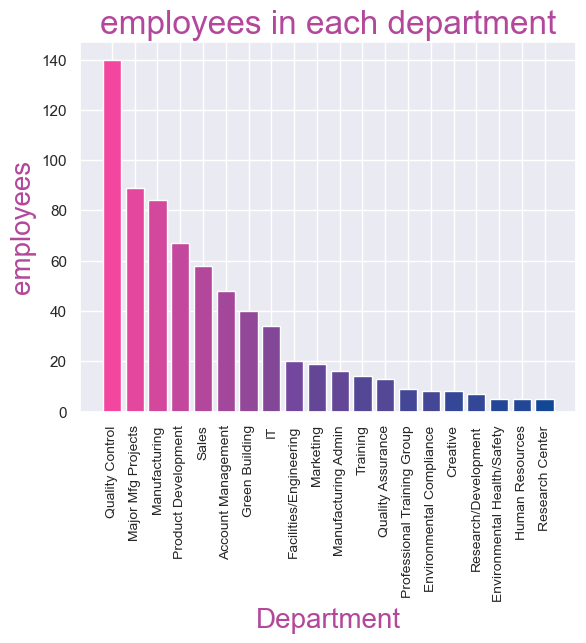

In [896]:
plt.bar(data['Department'].unique(),data['Department'].value_counts() , color = ['#F3479F','#E3479E','#D3479D','#C3479C','#B3479B','#A3479A','#934799'
,'#834798','#73479E','#634796','#634796','#534796','#534796','#434796','#434796','#334796','#334796','#234796','#234796','#134796'])
plt.xticks( rotation =90  , size = 10 )
plt.title('employees in each department' , size = 24 , color = '#B3479B')
plt.xlabel('Department', size = 20,color = '#B3479B')
plt.ylabel('employees', size = 20,color = '#B3479B')

### 2- the 5 oldest and latest employee in our company

In [897]:
data.sort_values(['Years'], ascending = False)[:5]

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,full name
564,565,Jan,Mikayiylian,Male,2016-01-08,5,Quality Assurance,Egypt,West,2009,24108,4.5,6,0,0,Jan Mikayiylian
501,502,Akram,Alhulwanii,Male,2016-01-12,5,IT,Egypt,East,2790,33480,1.0,1,0,8,Akram Alhulwanii
344,345,Rasul,Aleumurii,Male,2016-08-23,4,Manufacturing,Saudi Arabia,Main,1595,19140,5.0,0,0,0,Rasul Aleumurii
546,547,Amani,Altujjar,Female,2016-11-21,4,Product Development,Egypt,West,2654,31848,3.0,0,1,7,Amani Altujjar
548,549,Amin,Hamid,Male,2016-06-16,4,Quality Assurance,Egypt,North,1113,13356,3.0,4,0,11,Amin Hamid


In [898]:
data.sort_values(['Years','Start Date'], ascending = True)[:5]

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,full name
169,170,Alaa,Almisri,Female,2020-01-16,0,Quality Assurance,Egypt,Main,3264,39168,5.0,6,5,4,Alaa Almisri
57,58,Aylyn,Dahadal,Female,2020-01-19,0,Quality Assurance,Egypt,West,2115,25380,5.0,0,0,0,Aylyn Dahadal
144,145,Ahmad,Muhamad,Male,2020-01-20,0,Product Development,United Arab Emirates,Main,2371,28452,5.0,0,0,1,Ahmad Muhamad
490,491,Diea,Jazar,Male,2020-01-20,0,Quality Control,Egypt,North,1447,17364,3.0,0,0,7,Diea Jazar
540,541,Fawaz,Ghazal,Male,2020-01-21,0,Quality Control,Egypt,North,2123,25476,5.0,0,0,15,Fawaz Ghazal


Text(0, 0.5, 'Employees')

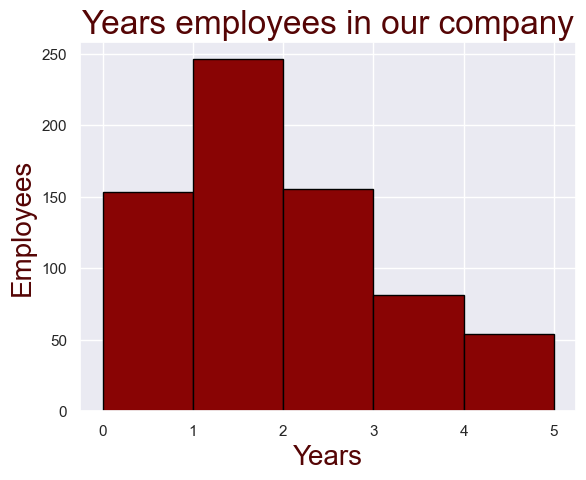

In [899]:
plt.hist(data['Years'], bins=5, color='#890404', edgecolor='black')
plt.title("Years employees in our company", size = 24 , color = '#550505')
plt.xlabel('Years',size = 20 , color = '#550505')
plt.ylabel('Employees',size = 20 , color = '#550505')

### 3- the most country have employee

In [900]:
s = data['Country'].value_counts()
s.index

Index(['Egypt', 'United Arab Emirates', 'Saudi Arabia', 'Syria', 'Lebanon'], dtype='object', name='Country')

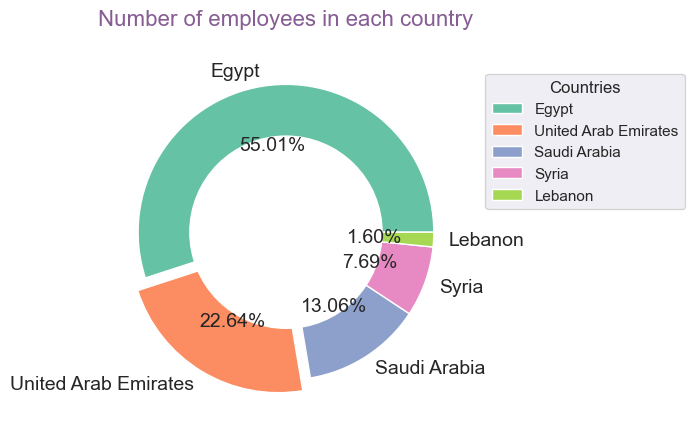

In [901]:
plt.pie(s , labels = s.index, autopct='%1.2f%%' ,textprops={'fontsize':14} , colors=sns.color_palette('Set2'),explode=[0, 0.1, 0, 0, 0])
### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title(
    label="Number of employees in each country", 
    fontdict={"fontsize":16},
    pad=16,
    color = '#875E93'
)
plt.legend(s.index ,loc="upper right" ,bbox_to_anchor=(1.6, 0.95) , title="Countries" ) 

### 4- Gender in our company

In [902]:
s = data['Gender'].value_counts()

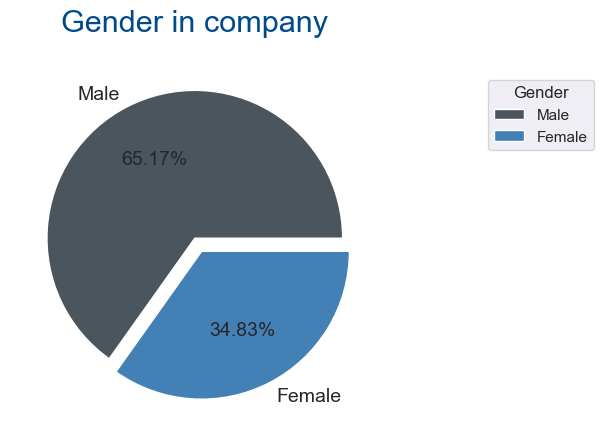

In [903]:
plt.pie(s , labels = s.index, autopct='%1.2f%%' ,textprops={'fontsize':14} , colors=['#4B555E','#4380B6'],explode=[0,0.1])
plt.title(
    label="Gender in company", 
    fontdict={"fontsize":22},
    pad=16,
    color = '#014A8A'
)
plt.legend(s.index ,loc="upper right" ,bbox_to_anchor=(1.6, 0.95) , title="Gender" ) 

### 5- the most center have employee in each country 

In [904]:
 emp = data.groupby(['Country','Center'])

In [905]:
emp[['Country','Center']].value_counts()

Country               Center
Egypt                 East       28
                      Main      131
                      North     125
                      South      33
                      West       62
Lebanon               Main        5
                      North       3
                      South       2
                      West        1
Saudi Arabia          East        6
                      Main       32
                      North      23
                      South       9
                      West       20
Syria                 East        5
                      Main       22
                      North      11
                      South       5
                      West       10
United Arab Emirates  East        8
                      Main       61
                      North      45
                      South      16
                      West       26
Name: count, dtype: int64

### 6- The average of monthly and annual salary

In [906]:
int(np.average(data['Monthly Salary']))

2068

In [907]:
int(np.average(data['Annual Salary']))

24818

Text(0, 0.5, 'Annual Salary')

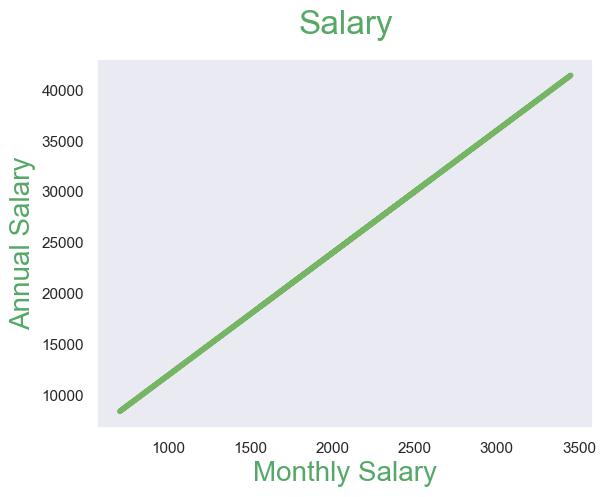

In [908]:
plt.plot(data['Monthly Salary'] ,data['Annual Salary'], color='#459F27', alpha=0.7 , linewidth=4 )
plt.grid()
plt.title('Salary',color = 'g' , size = 24 , pad = 18)
plt.xlabel('Monthly Salary',color = 'g' , size = 20 )
plt.ylabel('Annual Salary',color = 'g' , size = 20 )

### 7- the 5 oldest employees in each department

In [909]:
print(data['Start Date'][data['Department']=='IT'].min())

2016-01-12 00:00:00


In [910]:
for i in data['Department'].unique() :
    print(data[['full name','Department','Start Date']][data['Department']==i].min())
    print("#####################################################")



full name       Abd Allah Aldahan
Department        Quality Control
Start Date    2016-06-26 00:00:00
dtype: object
#####################################################
full name            Ailya Sharaf
Department     Major Mfg Projects
Start Date    2017-09-28 00:00:00
dtype: object
#####################################################
full name     Abd Alwahhab Muhamad
Department           Manufacturing
Start Date     2016-02-05 00:00:00
dtype: object
#####################################################
full name     Abd Alruhmin Alnasar
Department     Product Development
Start Date     2016-02-02 00:00:00
dtype: object
#####################################################
full name     Abd Alhadi Alzzahir
Department                  Sales
Start Date    2016-03-05 00:00:00
dtype: object
#####################################################
full name       Abd Alruhmin Hamj
Department     Account Management
Start Date    2016-04-20 00:00:00
dtype: object
############################

### 8- the most 10 employees have a hieght rating 

In [911]:
s = data.sort_values('Job Rate',ascending = False)
n = s[['full name','Department','Country','Job Rate']][0:10]

### 9- The most 10 employee have sick leaves 

In [912]:
s = data.sort_values('Sick Leaves',ascending = False)
s[['full name','Department','Country','Sick Leaves']][0:10]

,full name,Department,Country,Sick Leaves
448,Lawiy Shiah,Quality Assurance,Egypt,6
651,Muhamad Haydar,Facilities/Engineering,United Arab Emirates,6
354,Amir Alkhatib,Account Management,Egypt,6
160,Muhamad Alshghry,Manufacturing,Egypt,6
159,Lana Alhabash,Manufacturing,Egypt,6
492,Abdaleziz Eiwad,Quality Assurance,United Arab Emirates,6
363,Ahmad Iidlibi,Marketing,Saudi Arabia,6
149,Kamal Hajl,Facilities/Engineering,Syria,6
608,Muhamad Albarnawi,Manufacturing Admin,Egypt,6
147,Omar Milatu,Manufacturing,Syria,6


### 10- The most 10 employee have unpaid leaves

In [913]:
s = data.sort_values('Unpaid Leaves',ascending = False)
s[['full name','Department','Country','Unpaid Leaves']][0:10]

,full name,Department,Country,Unpaid Leaves
194,Samar Alqutb,Account Management,Egypt,6
53,Shadi Salayk,Quality Assurance,United Arab Emirates,6
458,Muhamad Shadi Alkhiat,Quality Assurance,United Arab Emirates,6
485,Iad Alhusayn,Quality Assurance,Egypt,6
245,Khalid Alem,Quality Control,United Arab Emirates,6
500,Asra Jameah,Manufacturing,Egypt,6
44,Ahmad Laylana,Facilities/Engineering,Egypt,6
511,Basil Salih,Facilities/Engineering,Egypt,6
529,Husam Badr,Account Management,Egypt,6
307,Jablah Alsulayman,Quality Assurance,Lebanon,6


### 11- The most 10 employee have leaves

In [914]:
data['Total Leaves']= data['Sick Leaves']+ data['Unpaid Leaves']

In [915]:
s = data.sort_values('Total Leaves',ascending = False)
s[['full name','Department','Country','Total Leaves']][0:10]

,full name,Department,Country,Total Leaves
669,Dania Earmush,Product Development,United Arab Emirates,12
44,Ahmad Laylana,Facilities/Engineering,Egypt,11
627,Muhamad Suqabani,Quality Assurance,Egypt,11
459,Omaimah Tqi Aldiyn,Quality Assurance,Egypt,11
325,Muhamad Shadi Alghazy,Research Center,United Arab Emirates,11
599,Iad Badran,Quality Control,Egypt,11
169,Alaa Almisri,Quality Assurance,Egypt,11
194,Samar Alqutb,Account Management,Egypt,10
62,Muhamad Asamy,Manufacturing,United Arab Emirates,10
256,Asf Abultif,Manufacturing,Egypt,10


### 12- The most 5 employee have a overtime hours

In [916]:
s = data.sort_values('Overtime Hours', ascending = False)
n=s[['full name','Department','Country','Overtime Hours']][0:5]

Text(0, 0.5, 'employees')

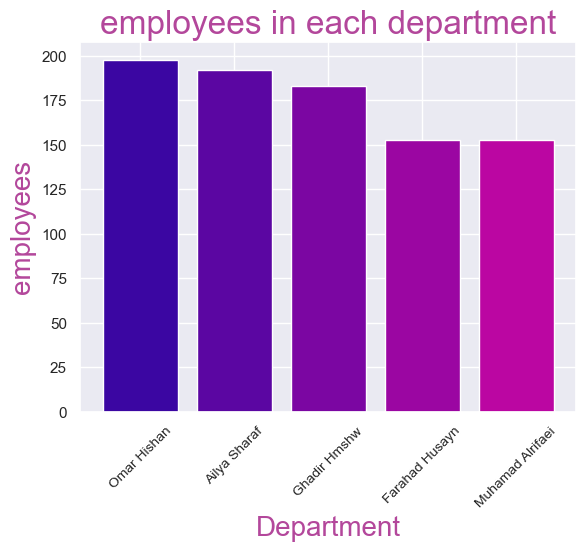

In [917]:
plt.bar(n['full name'],n['Overtime Hours'], color = ['#3B06A2','#5B06A2','#7B06A2','#9B06A2','#BB06A2'])
plt.xticks( rotation =45  , size = 10 )
plt.title('employees in each department' , size = 24 , color = '#B3479B')
plt.xlabel('Department', size = 20,color = '#B3479B')
plt.ylabel('employees', size = 20,color = '#B3479B')

### 13- the most 10 employees have hieght  annual salary

In [918]:
s = data.sort_values('Annual Salary', ascending = False)
n =s[['full name','Department','Country','Annual Salary']][0:10]
n

,full name,Department,Country,Annual Salary
324,Ashraf Aleid,Account Management,Egypt,41400
347,Dalia Hamdan,Major Mfg Projects,Egypt,41352
316,Muhamad Almisri,Quality Control,Saudi Arabia,41316
323,Muhamad Salhany,Quality Control,Egypt,41136
270,Eala Darkzifli,Quality Assurance,Egypt,41040
364,Fadi Ghazzawi,Quality Control,Egypt,41016
222,Jawaher Shaykhus,Quality Assurance,Egypt,40968
288,Sana Alhusayn,Account Management,Egypt,40944
118,Muhamad Jhad,Manufacturing,Egypt,40932
101,Ayman Muhamad,Marketing,Egypt,40920


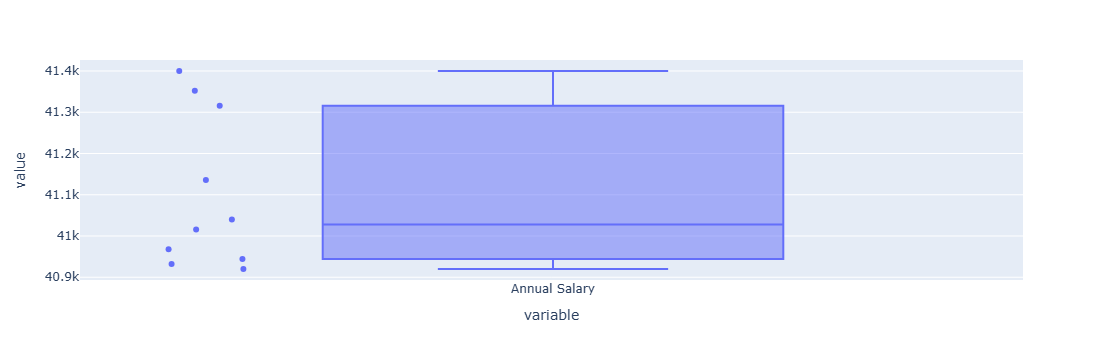

In [919]:
px.box(n['Annual Salary'],points="all")

### 14- The most department has hieght Annual

In [920]:
s = data.groupby('Country')['Annual Salary'].sum().sort_values(ascending = False)
s

Country
Egypt                   9504864
United Arab Emirates    3860280
Saudi Arabia            2190552
Syria                   1281564
Lebanon                  262632
Name: Annual Salary, dtype: int64

In [921]:
scal = (s.values -262632)/(9504864-262632)

<StemContainer object of 3 artists>

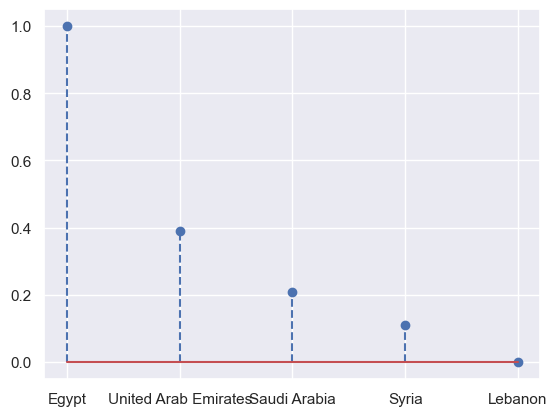

In [922]:
plt.stem(s.index,scal , '--')

### 15- The most Country has leaves

In [923]:
s = data.groupby('Country')['Total Leaves'].sum().sort_values(ascending = False)

In [924]:
s

Country
Egypt                   908
United Arab Emirates    372
Saudi Arabia            191
Syria                   134
Lebanon                  27
Name: Total Leaves, dtype: int64

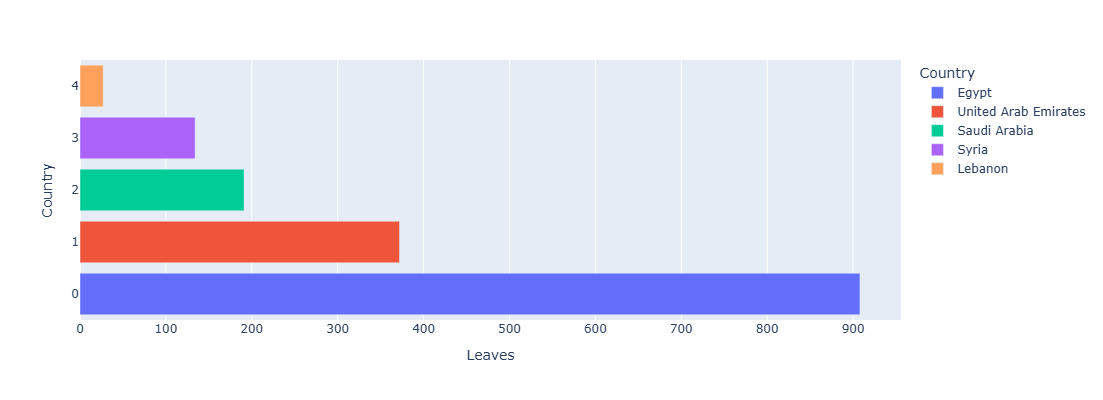

In [925]:
px.bar(s.index , s.values, height=400 , color ='Country' , labels={'index':'Country', 'x':'Leaves'})


### 16- The department has leaves

In [926]:
s = data.groupby('Department')['Total Leaves'].sum().sort_values(ascending = False)
s.values

array([300, 211, 205, 204, 170,  96,  74,  56,  45,  38,  38,  36,  31,
        29,  29,  18,  17,  17,  11,   7], dtype=int64)

C:\Users\Len\AppData\Local\Temp\ipykernel_15048\2597659179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='Department'>

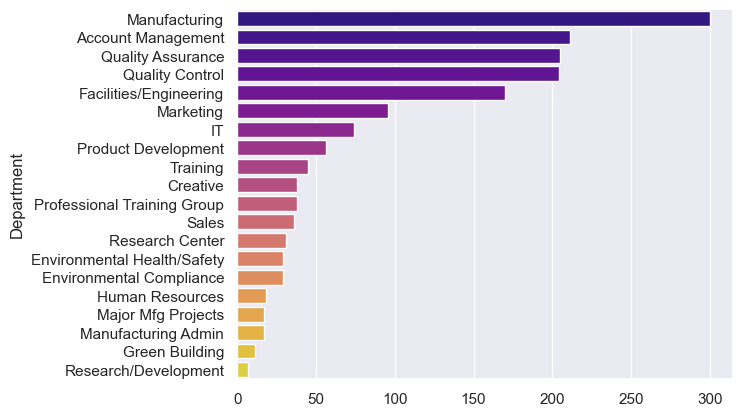

In [927]:
sns.set_style('darkgrid')
sns.barplot( x = s.values , y = s.index   , palette ='plasma')

### 16- The most country has overtime hours

In [928]:
s = data.groupby('Country')['Overtime Hours'].sum().sort_values(ascending = False)
s

Country
Egypt                   5662
Saudi Arabia            1732
United Arab Emirates    1380
Syria                    496
Lebanon                  171
Name: Overtime Hours, dtype: int64

In [929]:
import plotly.graph_objects as go


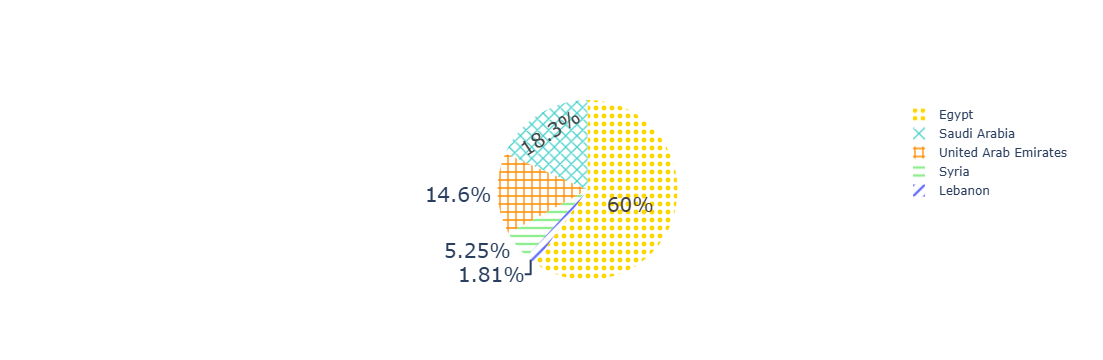

In [930]:
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen"] 
go.Figure(
    data=[
        go.Pie(
            labels=s.index,
            values=s.values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "x", "+", "-" ,'/']))
        )
    ]
)